In [1]:
import numpy as np
import pandas as pd

df = pd.read_pickle('train_data.pkl')
df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,2,73,20071228.0,175.0,5,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,2
1,3,1,9,32,19970401.0,410.0,3,-9.990000e+02,-999.0,-9.990000e+02,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,2
2,4,1,8,89,20161228.0,468.0,5,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,2
3,7,1,10,141,20000814.0,353.0,3,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,2
4,9,1,9,32,20050901.0,196.0,3,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,2


In [2]:
df.shape

(301, 58)

In [3]:
test = pd.read_pickle('test_data.pkl')
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,0,10,139,19981125.0,300.0,3,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693.0,693.0,2
1,5,0,11,149,20160309.0,44.0,4,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379.0,371.0,2
2,6,0,13,103,19890427.0,276.0,3,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,-999.0,-999.0,0
3,8,0,0,71,20100226.0,363.0,3,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760.0,760.0,2
4,10,0,12,26,20040604.0,213.0,3,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437.0,385.0,2


In [4]:
test.shape

(127, 58)

In [5]:
inst_id = test['inst_id']
test = test.drop(['inst_id'], axis = 1)
del df['inst_id']

In [6]:
X = df.drop(['OC'], axis = 1)
y = df['OC']

In [7]:
X_test = test.drop(['OC'], axis = 1)
y_test = test['OC']

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
eclf = RandomForestClassifier(n_estimators=100,
                              max_features=2, # selection되는 feature 개수
                              n_jobs=-1, oob_score=True)

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.9468306010928963

In [10]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [11]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X, y)

C:\Users\Saeyoon Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
grid.best_score_

0.9568106312292359

In [13]:
grid.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 31}

In [14]:
grid.best_estimator_.oob_score_

0.9401993355481728

In [15]:
grid.best_estimator_.feature_importances_

array([0.00938613, 0.04679981, 0.06572276, 0.07983175, 0.02782092,
       0.02161535, 0.01656324, 0.01567684, 0.00723424, 0.00893928,
       0.02259852, 0.02546113, 0.0063131 , 0.03407854, 0.01518011,
       0.00695967, 0.02172629, 0.01315421, 0.00419969, 0.02073682,
       0.01635073, 0.00191532, 0.01419708, 0.02507687, 0.00678864,
       0.01307328, 0.01055571, 0.01083724, 0.00978827, 0.01864014,
       0.01064834, 0.01728996, 0.01781259, 0.01761746, 0.01016487,
       0.0247941 , 0.00435473, 0.04646468, 0.01227542, 0.01705263,
       0.00893394, 0.00572536, 0.00912227, 0.01957019, 0.00164794,
       0.00859323, 0.01726081, 0.00182331, 0.00330812, 0.00996698,
       0.01531196, 0.        , 0.00177443, 0.02925573, 0.04262038,
       0.04938891])

In [16]:
np.argsort(grid.best_estimator_.feature_importances_)[::-1]

array([ 3,  2, 55,  1, 37, 54, 13, 53,  4, 11, 23, 35, 10, 16,  5, 19, 43,
       29, 32, 33, 31, 46, 39,  6, 20,  7, 50, 14, 22, 17, 25, 38, 27, 30,
       26, 34, 49, 28,  0, 42,  9, 40, 45,  8, 15, 24, 12, 41, 36, 18, 48,
       21, 47, 52, 44, 51], dtype=int64)

In [17]:
estimator1 = RandomForestClassifier(n_estimators=94,
                              max_features='auto', max_depth=10,
                              n_jobs=-1, oob_score=True)
cross_val_score(estimator1, X, y, cv=5).mean()

0.9534972677595629

## AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, 
                          learning_rate=0.1)

In [19]:
params = {"base_estimator__criterion" : ["gini", "entropy"],
          "base_estimator__max_features" : [7,8],
          "base_estimator__max_depth" : [1,2],
          "n_estimators": [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]}

In [20]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X, y)

C:\Users\Saeyoon Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
grid.best_score_

0.9568106312292359

In [22]:
grid.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': 7,
 'n_estimators': 52}

In [23]:
grid.best_estimator_.feature_importances_

array([0.01923077, 0.        , 0.01923077, 0.09615385, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01923077,
       0.05769231, 0.03846154, 0.        , 0.05769231, 0.01923077,
       0.        , 0.01923077, 0.03846154, 0.        , 0.01923077,
       0.        , 0.        , 0.        , 0.        , 0.01923077,
       0.        , 0.        , 0.        , 0.03846154, 0.        ,
       0.        , 0.        , 0.        , 0.01923077, 0.05769231,
       0.01923077, 0.        , 0.13461538, 0.        , 0.03846154,
       0.        , 0.01923077, 0.        , 0.        , 0.03846154,
       0.        , 0.01923077, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01923077, 0.01923077, 0.05769231,
       0.09615385])

In [24]:
estimator2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, criterion = 'gini', max_features = 7), 
                          n_estimators=52, learning_rate=0.1)

cross_val_score(estimator2, X, y, cv=5).mean()

0.9601639344262296

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
eclf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.9568306010928962

In [27]:
params ={
    "n_estimators" : [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
    "learning_rate" : [i for i in np.linspace(0.1,1, 10)]}

In [28]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X, y)

C:\Users\Saeyoon Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
grid.best_score_

0.9568106312292359

In [30]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [31]:
estimator3 = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
cross_val_score(eclf, X, y, cv=5).mean()

0.9534972677595629

## XGBoost

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier
eclf = XGBClassifier(max_depth=3, learning_rate=0.5, n_estimators=50, n_jobs=-1)

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf, X, y, cv=5).mean()

0.9468306010928963

In [34]:
params = {
    'max_depth': [1,2,3,4,5,6,7, 10, 15, 20],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
    "learning_rate" : [i for i in np.linspace(0.1,1, 10)]
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X, y)

In [36]:
grid.best_score_

0.9568106312292359

In [37]:
grid.best_params_

{'learning_rate': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 31}

In [38]:
estimator4 = XGBClassifier(max_depth=4, learning_rate=0.7000000000000001, n_estimators=31, n_jobs=-1)
cross_val_score(eclf, X, y, cv=5).mean()

0.9468306010928963

## LightGBM

In [39]:
import lightgbm as lgb

eclf = lgb.LGBMClassifier(num_leaves=2)

params = {
    'max_depth': [1,2,3,4,5,6,7, 10, 15, 20],
    "learning_rate" : [i for i in np.linspace(0.1,1, 10)],
    'n_estimators': [20, 40, 60, 80, 100, 120]
}

grid = GridSearchCV(eclf, params, cv=5, scoring='roc_auc')
grid.fit(X, y)

C:\Users\Saeyoon Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=2, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20], 'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], 'n_estimators': [20, 40, 60, 80, 100, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 1, 'n_estimators': 40}

In [41]:
estimator5 = lgb.LGBMClassifier(max_depth = 1, n_estimators = 40, learning_rate = 0.9)
cross_val_score(eclf, X, y, cv=5).mean()

0.9501639344262296

## Stacking

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
estimator6 = SVC(probability=True)

In [64]:
# base_estimators = [estimator1, estimator3, estimator4, estimator5, estimator6]
base_estimators = [estimator1, estimator3, estimator4]

In [65]:
for estimator in base_estimators:
            estimator.fit(X, y)

In [66]:
meta_train_set = np.array([estimator.predict(X) for estimator in base_estimators]).T

In [67]:
for estimator in base_estimators:
    result = cross_val_score(estimator, meta_train_set, y, scoring="accuracy", cv=5).mean()
    print(result)

0.9966666666666667
0.9966666666666667
1.0


In [68]:
meta_train_set2 = np.array([estimator.predict_proba(X)[:,1] for estimator in base_estimators]).T

In [69]:
for estimator in base_estimators:
    result = cross_val_score(estimator, meta_train_set2, y, scoring="accuracy" , cv=5).mean()
    print(result)

1.0
1.0
1.0


In [70]:
new_X = np.concatenate([X, meta_train_set2], axis = 1)
new_X.shape

(301, 59)

In [71]:
for estimator in base_estimators:
    result = cross_val_score(estimator, new_X, y, scoring="accuracy", cv=5).mean()
    print(result)

1.0
1.0
1.0


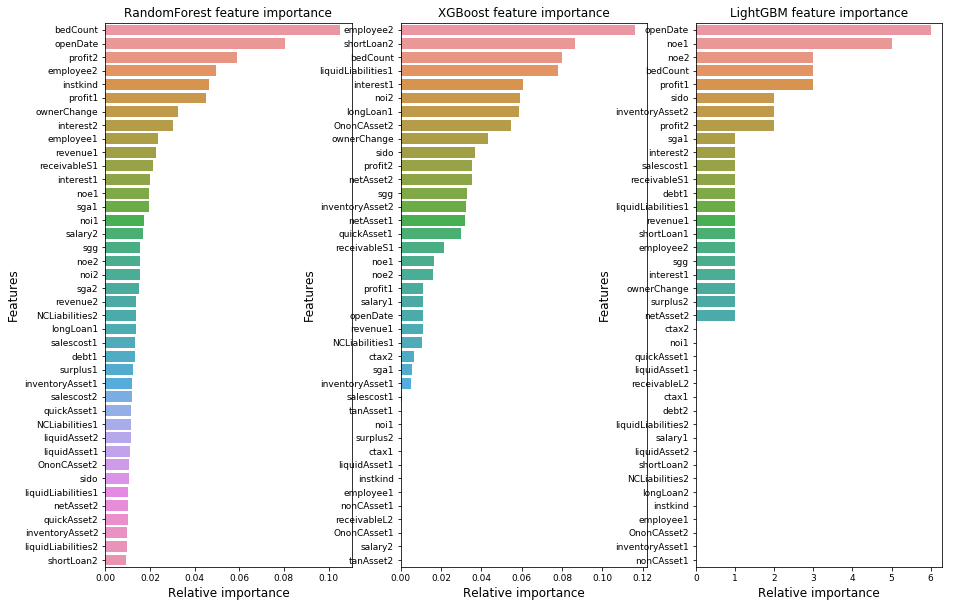

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,10))

names_classifiers = [("RandomForest",estimator1),("XGBoost", estimator4),("LightGBM",estimator5)]

nclassifier = 0
for i in range(3):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[i])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

In [72]:
meta_train_set = np.array([estimator.predict(X_test) for estimator in base_estimators]).T

In [73]:
meta_train_set2 = np.array([estimator.predict_proba(X_test)[:,1] for estimator in base_estimators]).T

In [74]:
y_pred = pd.DataFrame(meta_train_set2)
y_pred.head()

,0,1,2
0,0.946809,0.965355,0.998132
1,0.829787,0.503605,0.975748
2,0.542553,0.694844,0.801183
3,0.755319,0.975941,0.998256
4,0.882979,0.965355,0.995457


In [87]:
OC = y_pred.mean(axis=1)
OC = pd.DataFrame((OC > 0.8).astype(int))

In [88]:
OC.columns = ["OC"]

In [89]:
result = pd.concat([inst_id, OC], axis=1)
result.to_csv("submission.csv",index=False)